In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

### Classic FDR

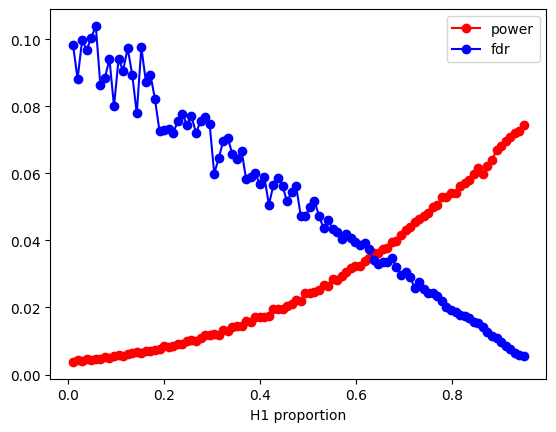

In [19]:
from utils import benjamini_hochberg

def simulate_simple(n=1000, h1_prop=0.5):
    h = np.random.binomial(1, h1_prop, size=n)
    x = np.random.normal(h, 1, size=n)
    p_values = scipy.stats.norm.cdf(-x)
    rejected = benjamini_hochberg(p_values, q=0.1)
    return h == 1, rejected

def show_stats_for_simple(h1_props):
    np.random.seed(42)
    result = {'power': [], 'fdr': []}
    for h1_prop in h1_props:
        power = []
        fdr = []
        for _ in range(1000):
            alt_true, rejected = simulate_simple(h1_prop=h1_prop)
            power.append((rejected & alt_true).sum() / max(1, alt_true.sum()))
            fdr.append((rejected & ~alt_true).sum() / max(1, rejected.sum()))
        
        result['power'].append(np.mean(power))
        result['fdr'].append(np.mean(fdr))
    
    plt.plot(h1_props, result['power'], label='power', color='red', marker='o')
    plt.plot(h1_props, result['fdr'], label='fdr', color='blue', marker='o')
    plt.xlabel('H1 proportion')
    plt.legend(loc='best')

show_stats_for_simple(np.linspace(0.01, 0.95, 100))

### Conformal FDR

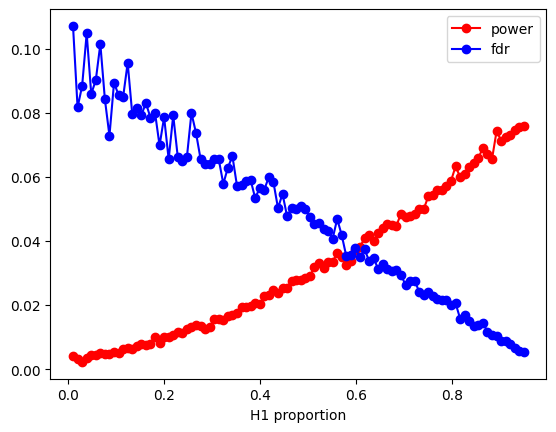

In [20]:
from conformal_bh.utils import conformal_p_values

def simulate_conformal(n=1000, h1_prop=0.5):
    h = np.random.binomial(1, h1_prop, size=n*2)
    x = np.random.normal(h, 1, size=n*2)
    p_values = conformal_p_values(h[:n] - x[:n], -x[n:])
    rejected = benjamini_hochberg(p_values, q=0.1)
    return h[n:] == 1, rejected

def show_stats_for_conformal(h1_props):
    np.random.seed(42)
    result = {'power': [], 'fdr': []}
    for h1_prop in h1_props:
        power = []
        fdr = []
        for _ in range(1000):
            alt_true, rejected = simulate_conformal(h1_prop=h1_prop)
            power.append((rejected & alt_true).sum() / max(1, alt_true.sum()))
            fdr.append((rejected & ~alt_true).sum() / max(1, rejected.sum()))
        
        result['power'].append(np.mean(power))
        result['fdr'].append(np.mean(fdr))
    
    plt.plot(h1_props, result['power'], label='power', color='red', marker='o')
    plt.plot(h1_props, result['fdr'], label='fdr', color='blue', marker='o')
    plt.xlabel('H1 proportion')
    plt.legend(loc='best')

show_stats_for_conformal(np.linspace(0.01, 0.95, 100))

### Random hypotheses

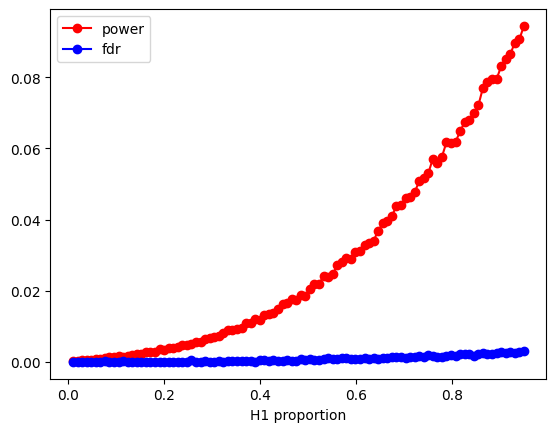

In [21]:
def simulate_random_hyp(n=1000, h1_prop=0.5):
    h = np.random.binomial(1, h1_prop, size=n)
    x = np.random.normal(h, 1, size=n)
    y = np.random.normal(x, 1, size=n)
    p_values = scipy.stats.norm.cdf(-x)
    rejected = benjamini_hochberg(p_values, q=0.1)
    return y > 0, rejected

def show_stats_for_random_hyp(h1_props):
    np.random.seed(42)
    result = {'power': [], 'fdr': []}
    for h1_prop in h1_props:
        power = []
        fdr = []
        for _ in range(1000):
            alt_true, rejected = simulate_random_hyp(h1_prop=h1_prop)
            power.append((rejected & alt_true).sum() / max(1, alt_true.sum()))
            fdr.append((rejected & ~alt_true).sum() / max(1, rejected.sum()))
        
        result['power'].append(np.mean(power))
        result['fdr'].append(np.mean(fdr))
    
    plt.plot(h1_props, result['power'], label='power', color='red', marker='o')
    plt.plot(h1_props, result['fdr'], label='fdr', color='blue', marker='o')
    plt.xlabel('H1 proportion')
    plt.legend(loc='best')

show_stats_for_random_hyp(np.linspace(0.01, 0.95, 100))

### Conformal random hypotheses

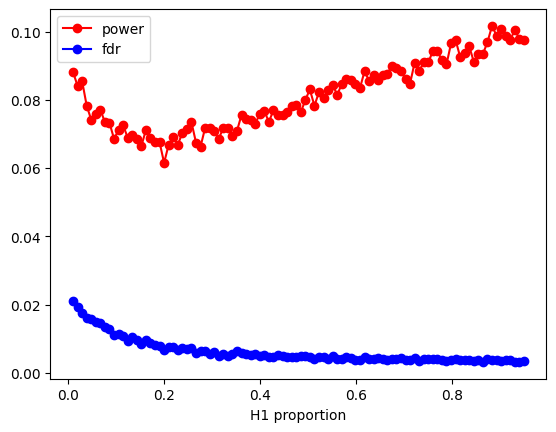

In [24]:
def simulate_conformal_random_hyp(n=1000, h1_prop=0.5):
    h = np.random.binomial(1, h1_prop, size=n*2)
    x = np.random.normal(h, 1, size=n*2)
    y = np.random.normal(x, 1, size=n*2)
    p_values = conformal_p_values(1 * (y[:n] > 0) - x[:n], -x[n:])
    rejected = benjamini_hochberg(p_values, q=0.1)
    return y[n:] > 0, rejected

def show_stats_for_conformal_random_hyp(h1_props):
    np.random.seed(42)
    result = {'power': [], 'fdr': []}
    for h1_prop in h1_props:
        power = []
        fdr = []
        for _ in range(1000):
            alt_true, rejected = simulate_conformal_random_hyp(h1_prop=h1_prop)
            power.append((rejected & alt_true).sum() / max(1, alt_true.sum()))
            fdr.append((rejected & ~alt_true).sum() / max(1, rejected.sum()))
        
        result['power'].append(np.mean(power))
        result['fdr'].append(np.mean(fdr))
    
    plt.plot(h1_props, result['power'], label='power', color='red', marker='o')
    plt.plot(h1_props, result['fdr'], label='fdr', color='blue', marker='o')
    plt.xlabel('H1 proportion')
    plt.legend(loc='best')

show_stats_for_conformal_random_hyp(np.linspace(0.01, 0.95, 100))